In [1]:
%matplotlib inline

# Import scikit-rf module
import skrf as rf
import matplotlib.pyplot as plt
rf.stylely()
cmufont = {'fontname':'CMU Sans Serif'}

In [2]:
# Read s-parameter measurement data from .sNp file 
channel = rf.Network('HFSSDesign2.s4p')

# Print out short description of the network
channel

4-Port Network: 'HFSSDesign2',  0.1-15.0 GHz, 299 pts, z0=[50.+0.j 50.+0.j 50.+0.j 50.+0.j]

In [3]:
# Print out s-parameter matrix
# channel.s

In [4]:

# No need to get Smith chart right now
# channel.plot_s_smith()
# channel.plot_s_smith(show_legend=False)

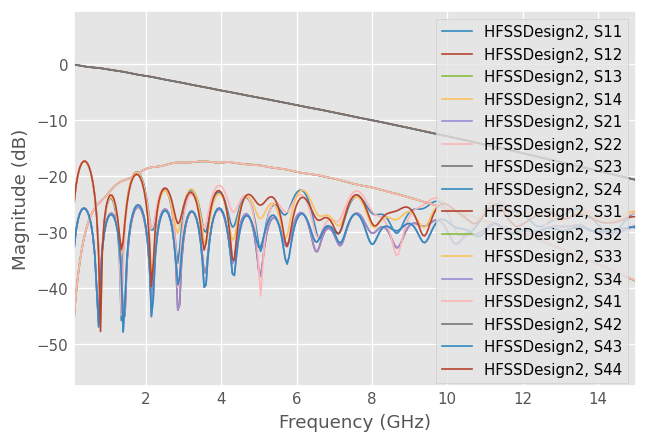

In [5]:
channel.plot_s_db()

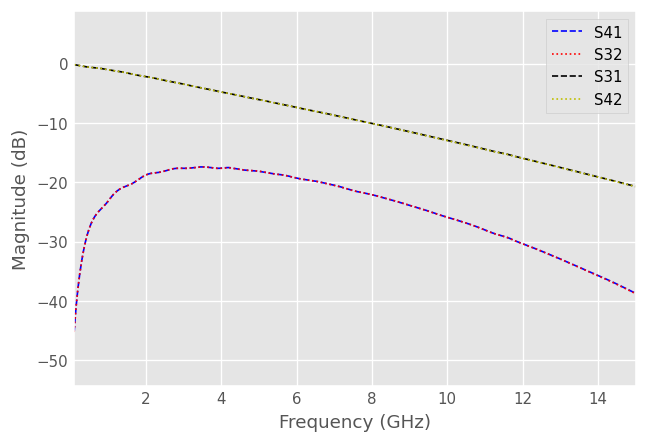

In [6]:
channel.plot_s_db(m=3,n=0,label='S41',color='b',linestyle='--')
channel.plot_s_db(m=2,n=1,label='S32',color='r',linestyle=':')
channel.plot_s_db(m=2,n=0,label='S31',color='k',linestyle='--')
channel.plot_s_db(m=3,n=1,label='S42',color='y',linestyle=':')

S41 and S32 are xtalk, while S31 and S42 insertion loss.

In [7]:
channel_dc = channel.extrapolate_to_dc(dc_sparam=[[0,0,1,0],[0,0,0,1],[1,0,0,0],[0,1,0,0]], kind='cubic')
channel_dc.write_touchstone(filename='HFSSDesign2_dc')

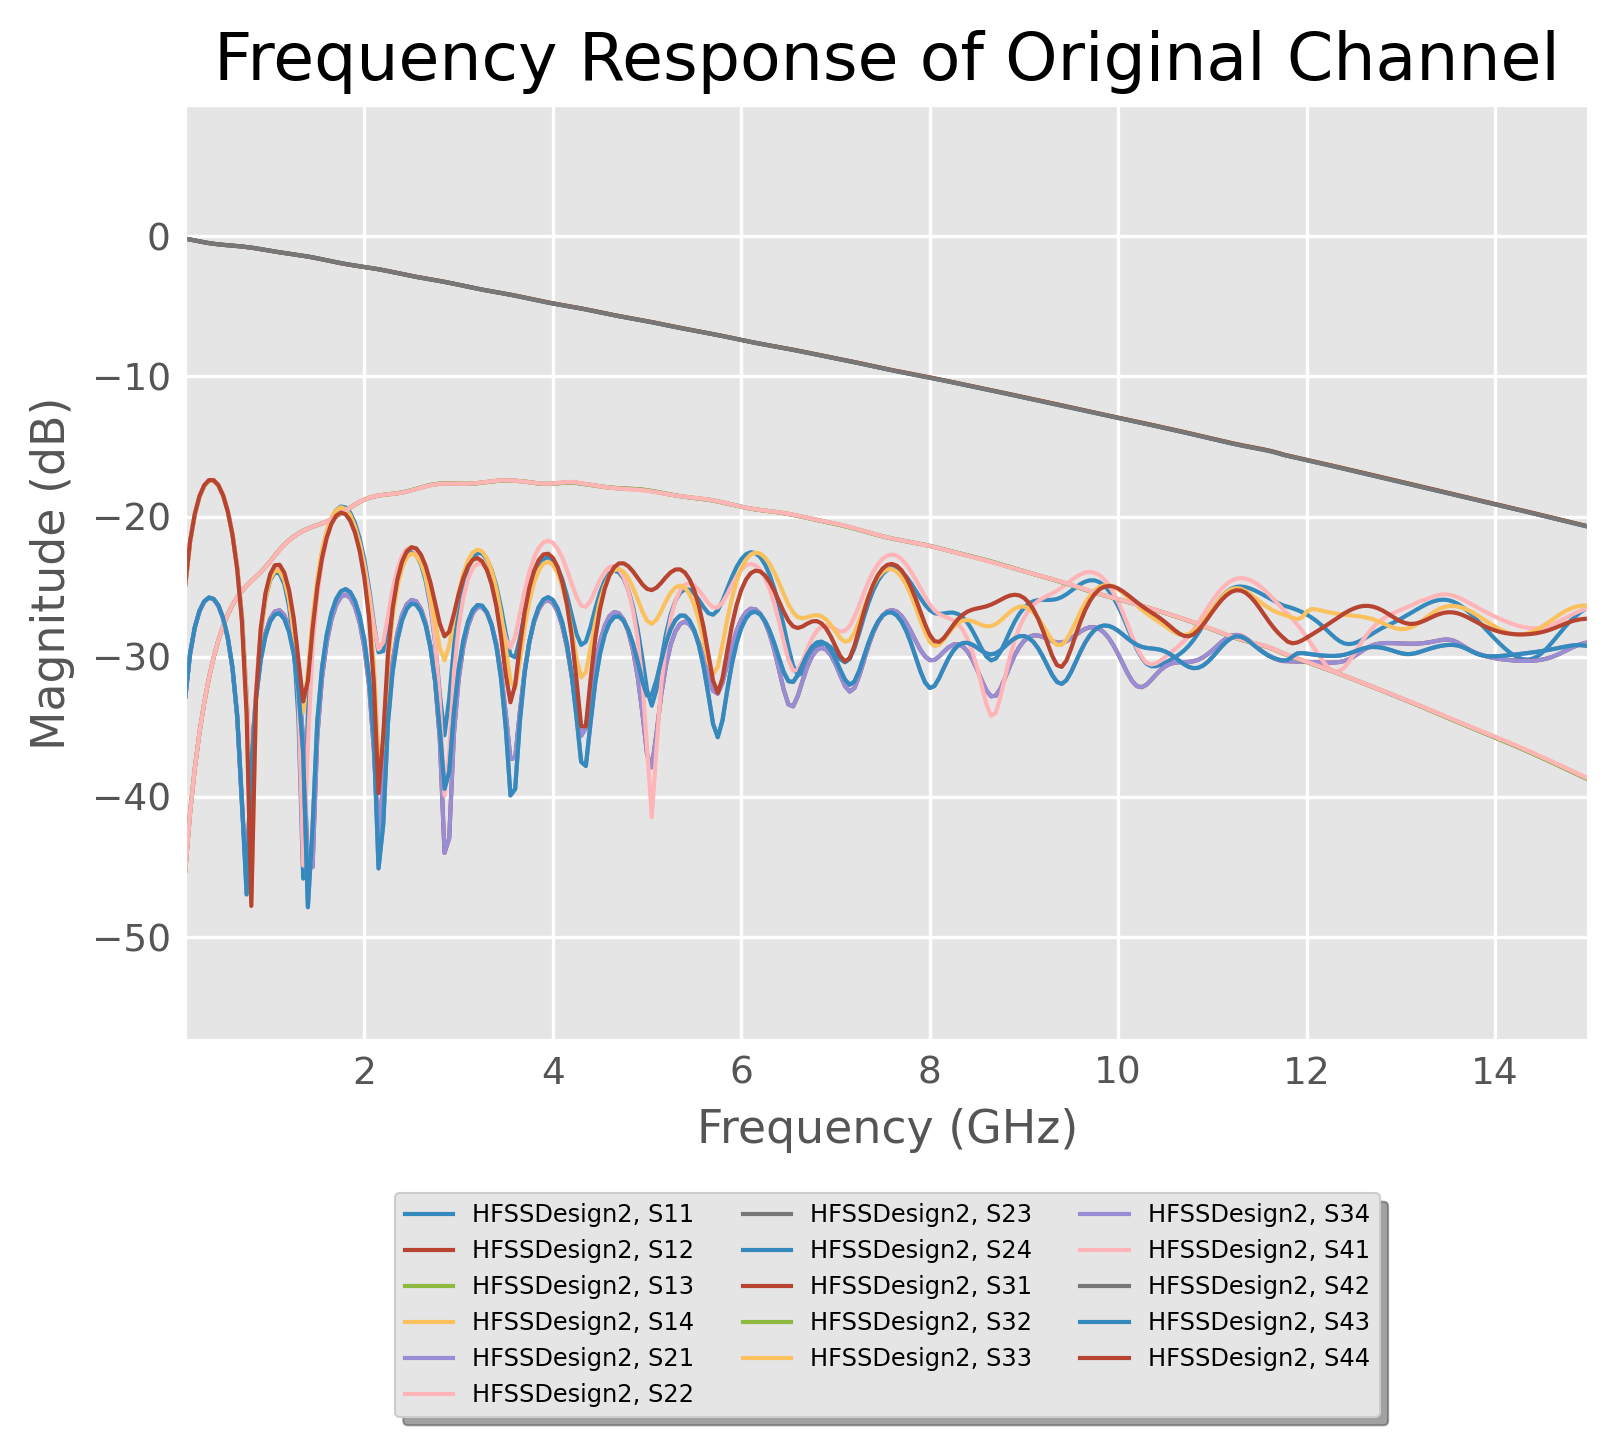

In [8]:
plt.figure(dpi=300)
plt.title("Frequency Response of Original Channel")
channel.plot_s_db()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize='xx-small',
          ncol=3, fancybox=True, shadow=True)

/Users/bon/opt/anaconda3/lib/python3.9/site-packages/skrf/mathFunctions.py:265: RuntimeWarning: divide by zero encountered in log10
  out = 20 * npy.log10(z)
/Users/bon/opt/anaconda3/lib/python3.9/site-packages/skrf/mathFunctions.py:265: RuntimeWarning: divide by zero encountered in log10
  out = 20 * npy.log10(z)
/Users/bon/opt/anaconda3/lib/python3.9/site-packages/skrf/mathFunctions.py:265: RuntimeWarning: divide by zero encountered in log10
  out = 20 * npy.log10(z)
/Users/bon/opt/anaconda3/lib/python3.9/site-packages/skrf/mathFunctions.py:265: RuntimeWarning: divide by zero encountered in log10
  out = 20 * npy.log10(z)
/Users/bon/opt/anaconda3/lib/python3.9/site-packages/skrf/mathFunctions.py:265: RuntimeWarning: divide by zero encountered in log10
  out = 20 * npy.log10(z)
/Users/bon/opt/anaconda3/lib/python3.9/site-packages/skrf/mathFunctions.py:265: RuntimeWarning: divide by zero encountered in log10
  out = 20 * npy.log10(z)
/Users/bon/opt/anaconda3/lib/python3.9/site-packages

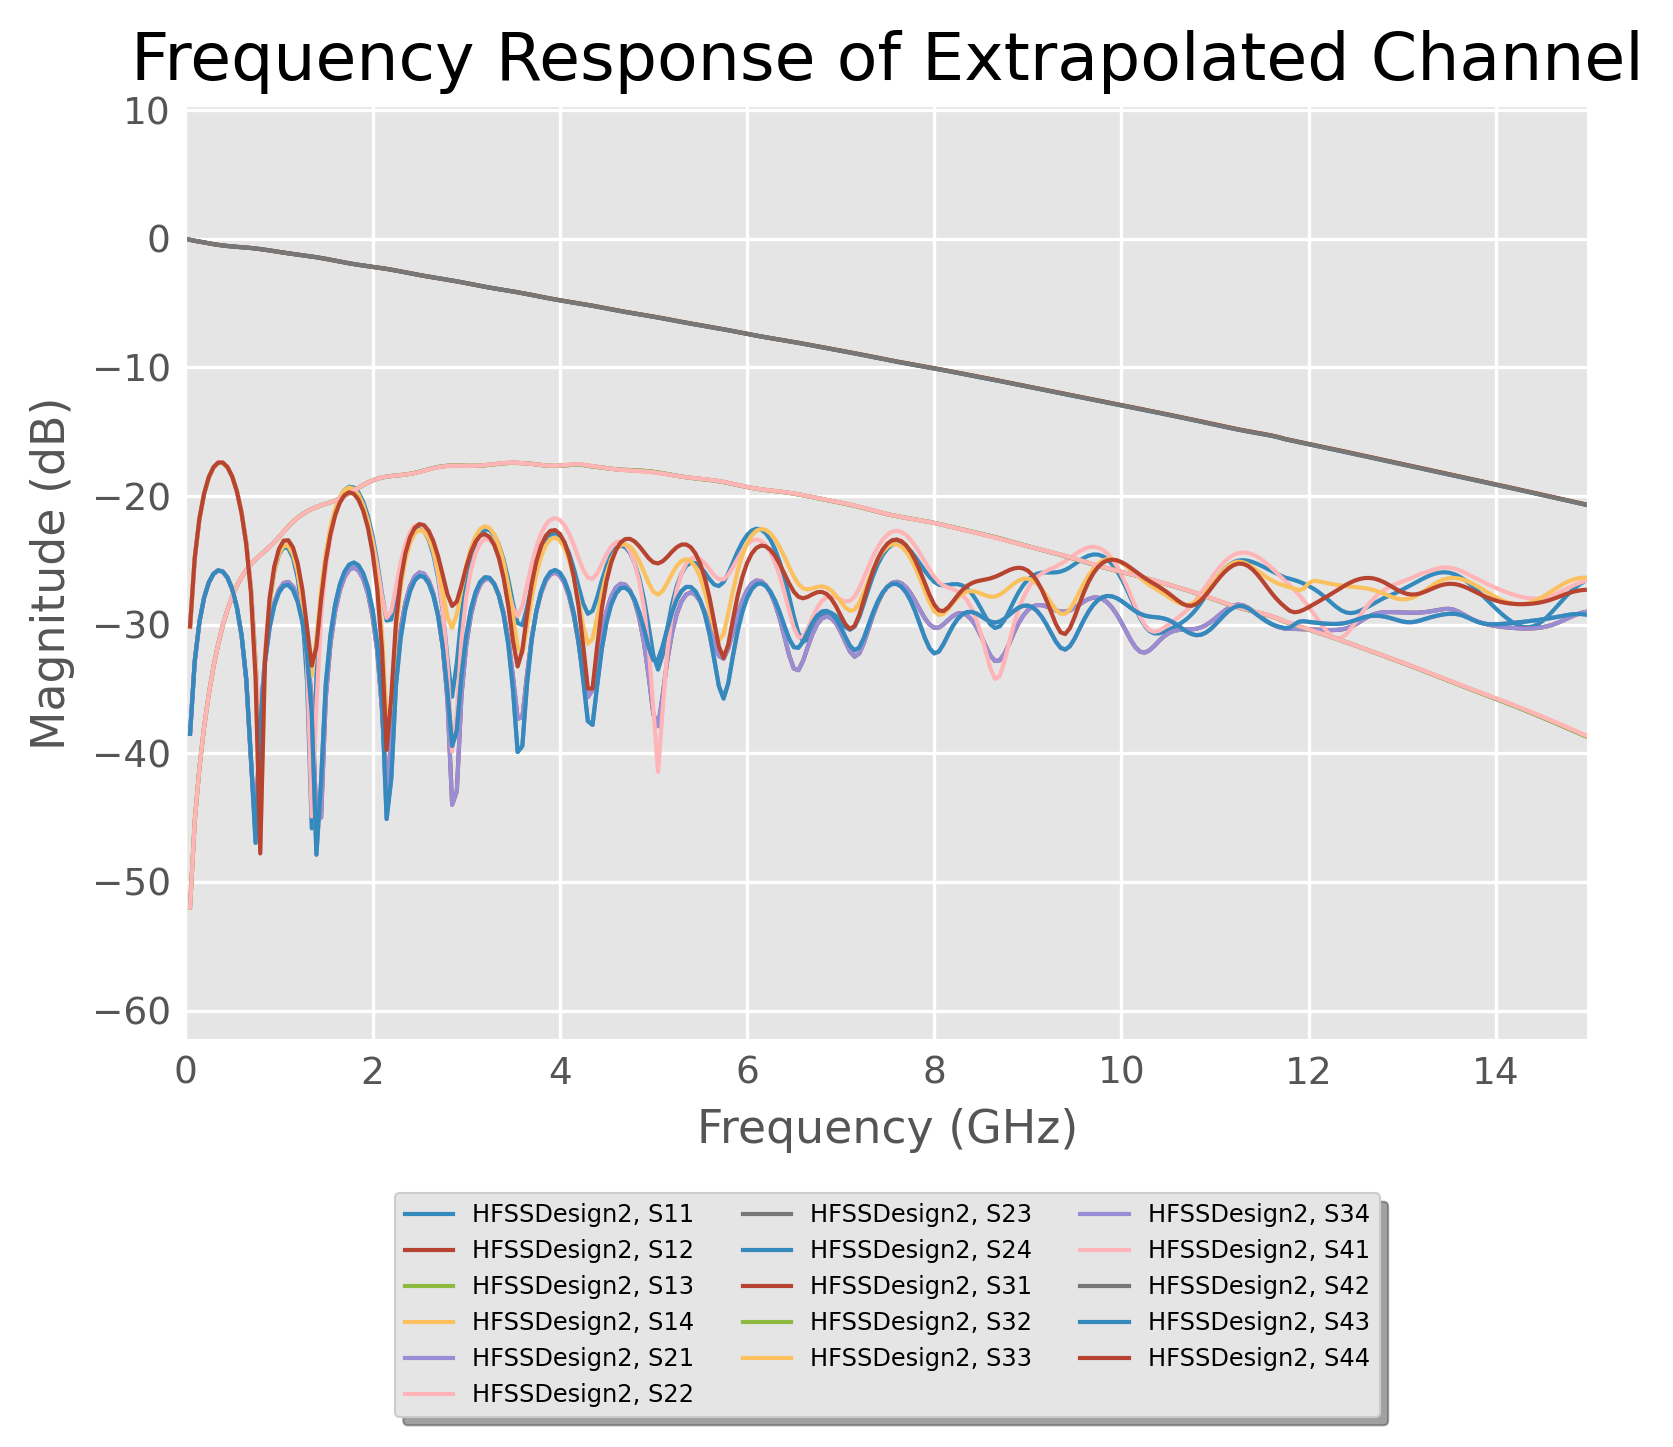

In [9]:
plt.figure(dpi=300)
plt.title("Frequency Response of Extrapolated Channel")
channel_dc.plot_s_db()
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fontsize='xx-small',
          ncol=3, fancybox=True, shadow=True)

/Users/bon/opt/anaconda3/lib/python3.9/site-packages/skrf/mathFunctions.py:265: RuntimeWarning: divide by zero encountered in log10
  out = 20 * npy.log10(z)
/Users/bon/opt/anaconda3/lib/python3.9/site-packages/skrf/mathFunctions.py:265: RuntimeWarning: divide by zero encountered in log10
  out = 20 * npy.log10(z)
/Users/bon/opt/anaconda3/lib/python3.9/site-packages/skrf/mathFunctions.py:265: RuntimeWarning: divide by zero encountered in log10
  out = 20 * npy.log10(z)
/Users/bon/opt/anaconda3/lib/python3.9/site-packages/skrf/mathFunctions.py:265: RuntimeWarning: divide by zero encountered in log10
  out = 20 * npy.log10(z)
/Users/bon/opt/anaconda3/lib/python3.9/site-packages/skrf/mathFunctions.py:265: RuntimeWarning: divide by zero encountered in log10
  out = 20 * npy.log10(z)
/Users/bon/opt/anaconda3/lib/python3.9/site-packages/skrf/mathFunctions.py:265: RuntimeWarning: divide by zero encountered in log10
  out = 20 * npy.log10(z)
/Users/bon/opt/anaconda3/lib/python3.9/site-packages

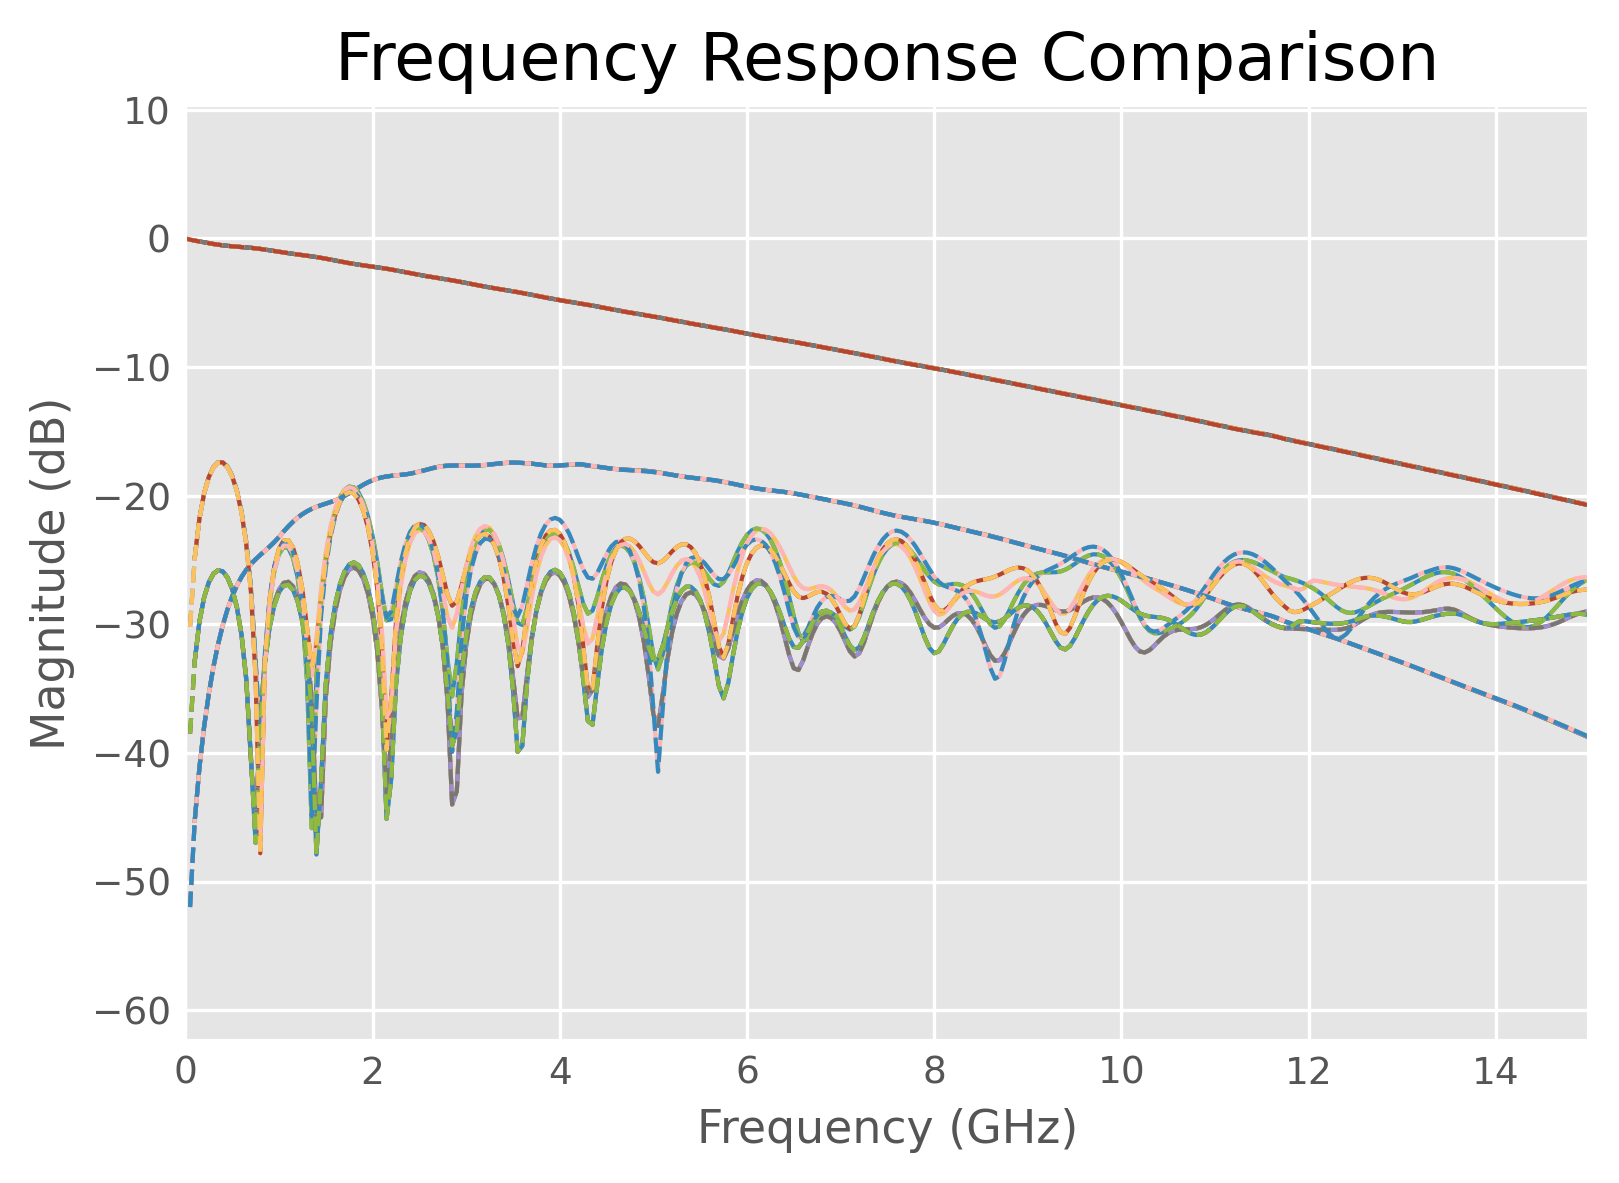

In [10]:
plt.figure(dpi=300)
plt.title("Frequency Response Comparison")
channel.plot_s_db(show_legend=False)
channel_dc.plot_s_db(show_legend=False, linestyle='--')

/Users/bon/opt/anaconda3/lib/python3.9/site-packages/skrf/network.py:3704: RuntimeWarning: Frequency doesn't begin from 0. Step response will not be correct.
  warnings.warn(


Text(0, 0.5, 'Magnitude')

findfont: Font family ['fontname'] not found. Falling back to DejaVu Sans.
findfont: Font family ['fontname'] not found. Falling back to DejaVu Sans.
findfont: Font family ['fontname'] not found. Falling back to DejaVu Sans.


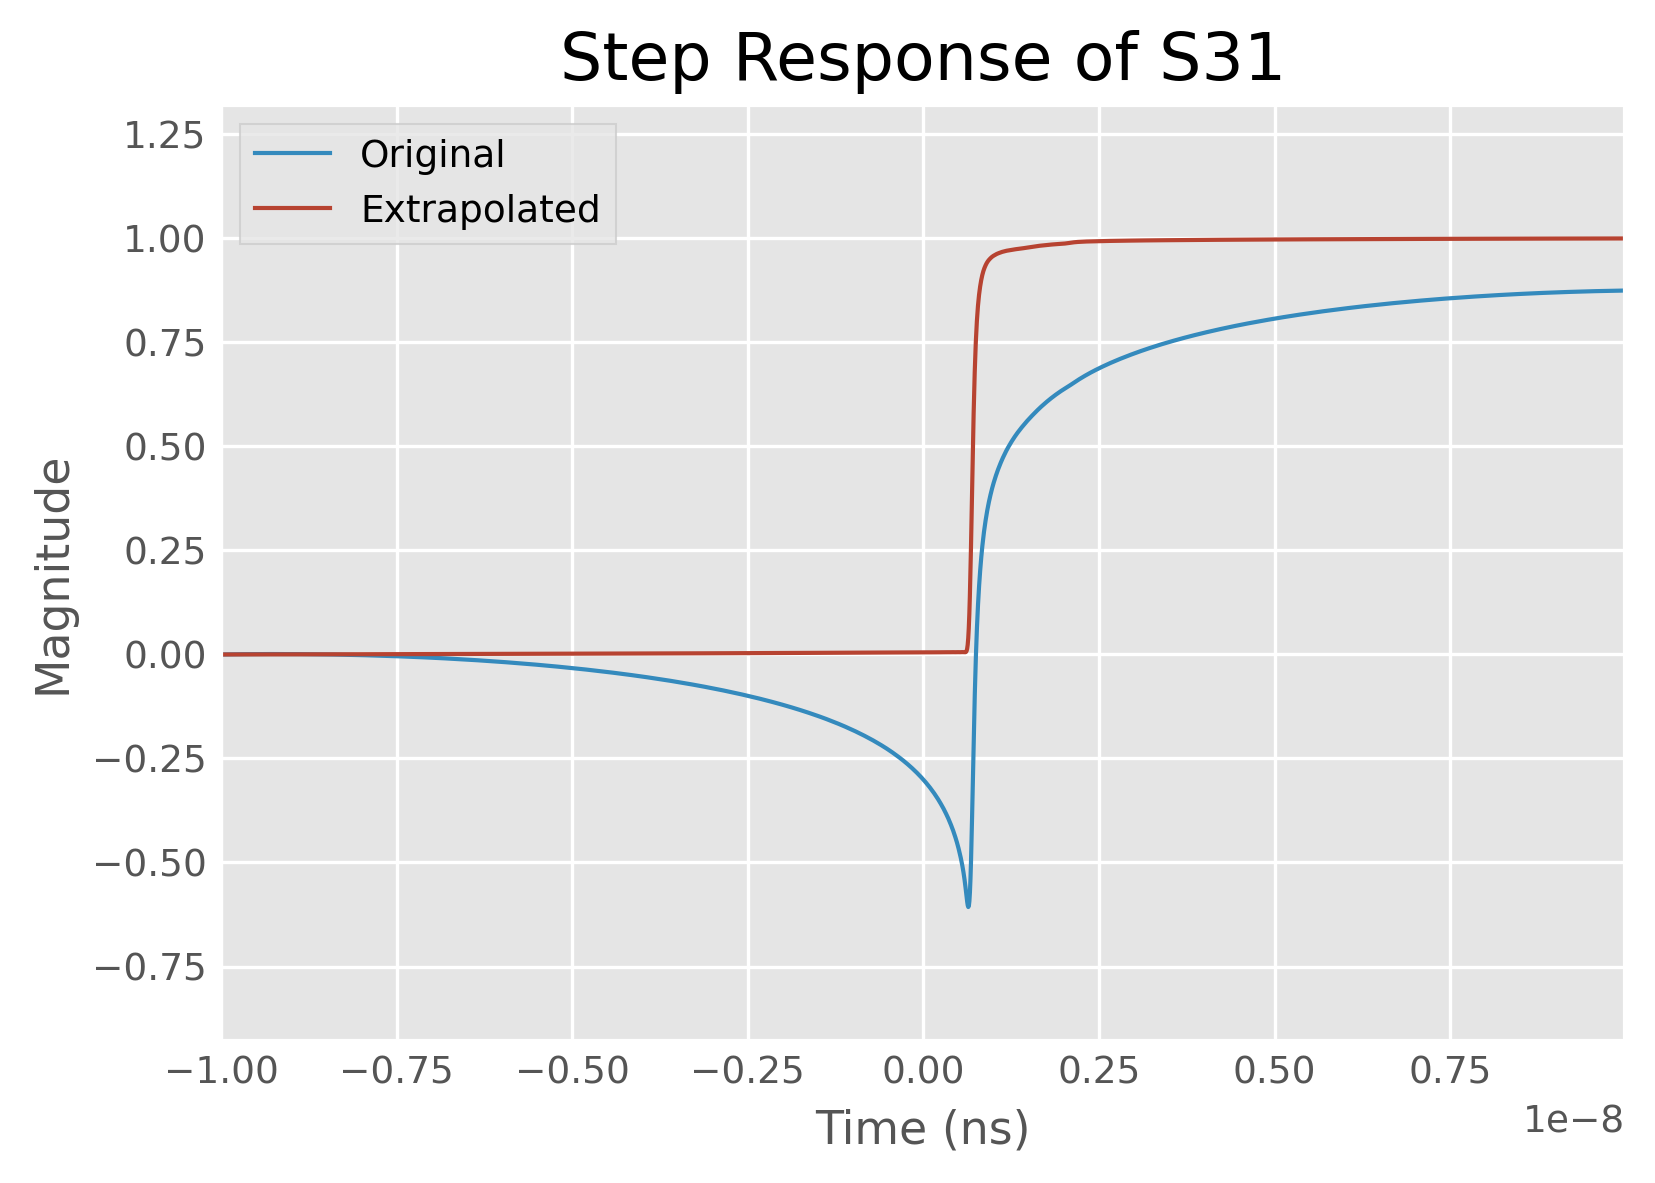

In [11]:
plt.figure(dpi=300)
plt.rcParams['font.family'] = cmufont
plt.title('Step Response of S31')
t1, y1 = channel.s31.step_response()
t2, y2 = channel_dc.s31.step_response()
plt.plot(t1, y1, label='Original')
plt.plot(t2, y2, label='Extrapolated')
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('Magnitude')

/Users/bon/opt/anaconda3/lib/python3.9/site-packages/skrf/network.py:3704: RuntimeWarning: Frequency doesn't begin from 0. Step response will not be correct.
  warnings.warn(


Text(0, 0.5, 'Magnitude')

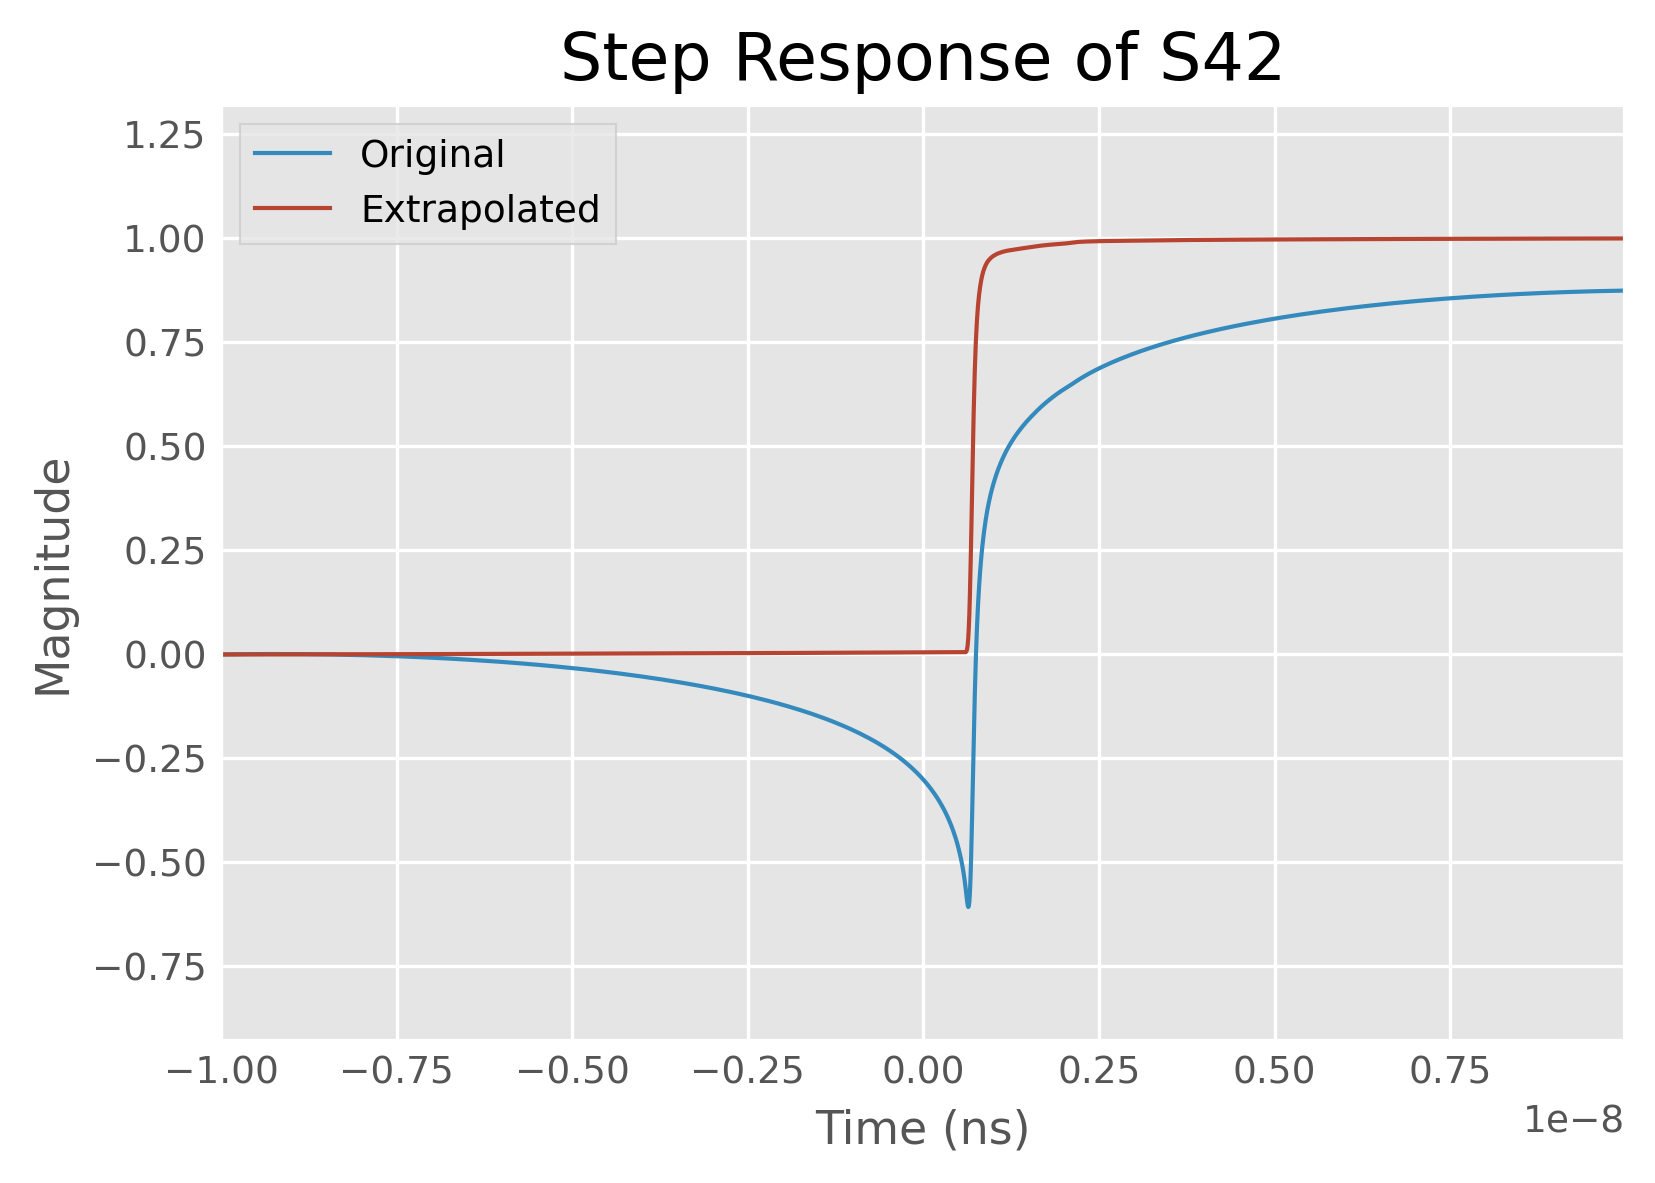

In [12]:
plt.figure(dpi=300)
plt.rcParams['font.family'] = cmufont
plt.title('Step Response of S42')
t1, y1 = channel.s42.step_response()
t2, y2 = channel_dc.s42.step_response()
plt.plot(t1, y1, label='Original')
plt.plot(t2, y2, label='Extrapolated')
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('Magnitude')

/Users/bon/opt/anaconda3/lib/python3.9/site-packages/skrf/network.py:3704: RuntimeWarning: Frequency doesn't begin from 0. Step response will not be correct.
  warnings.warn(
/Users/bon/opt/anaconda3/lib/python3.9/site-packages/skrf/network.py:3704: RuntimeWarning: Frequency doesn't begin from 0. Step response will not be correct.
  warnings.warn(


Text(0, 0.5, 'Magnitude')

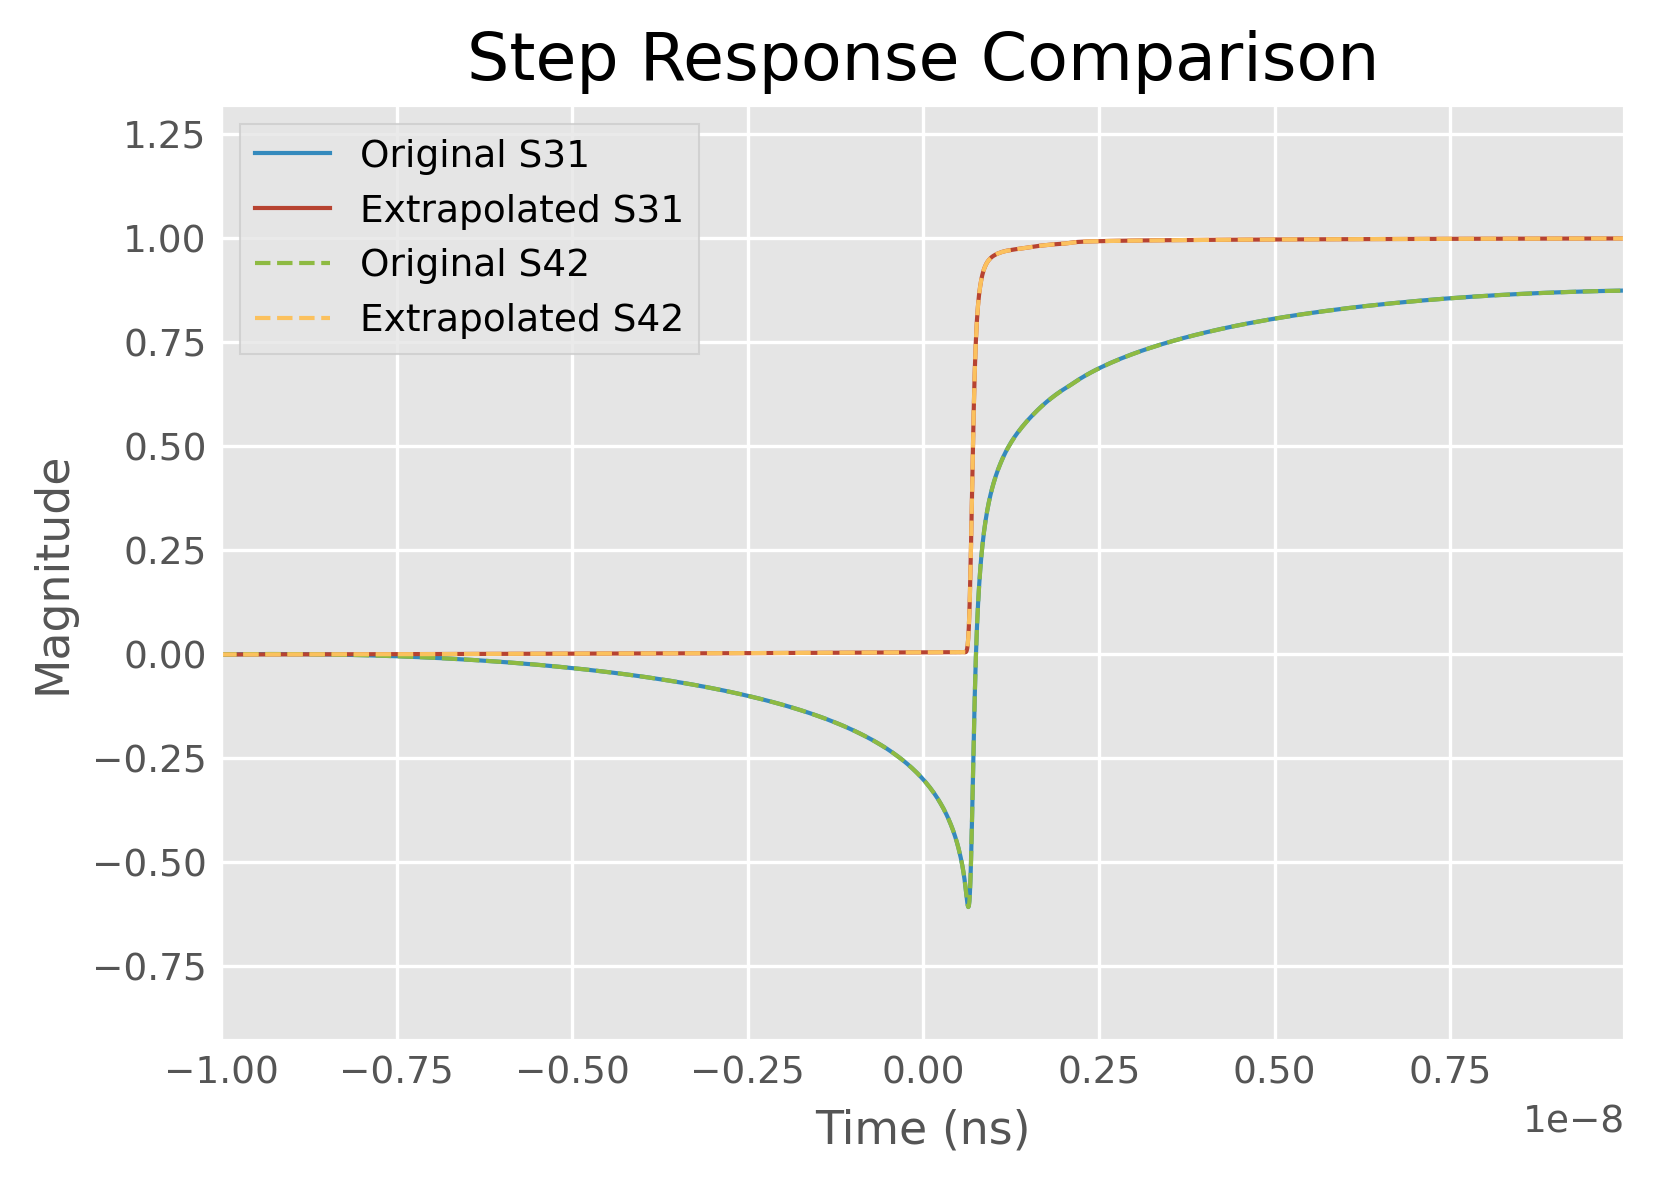

In [13]:
plt.figure(dpi=300)
plt.rcParams['font.family'] = cmufont
plt.title('Step Response Comparison')
t1, y1 = channel.s31.step_response()
t2, y2 = channel_dc.s31.step_response()
plt.plot(t1, y1, label='Original S31')
plt.plot(t2, y2, label='Extrapolated S31')
t3, y3 = channel.s42.step_response()
t4, y4 = channel_dc.s42.step_response()
plt.plot(t3, y3, label='Original S42',linestyle='--')
plt.plot(t4, y4, label='Extrapolated S42',linestyle='--')
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('Magnitude')

Text(0, 0.5, 'Magnitude')

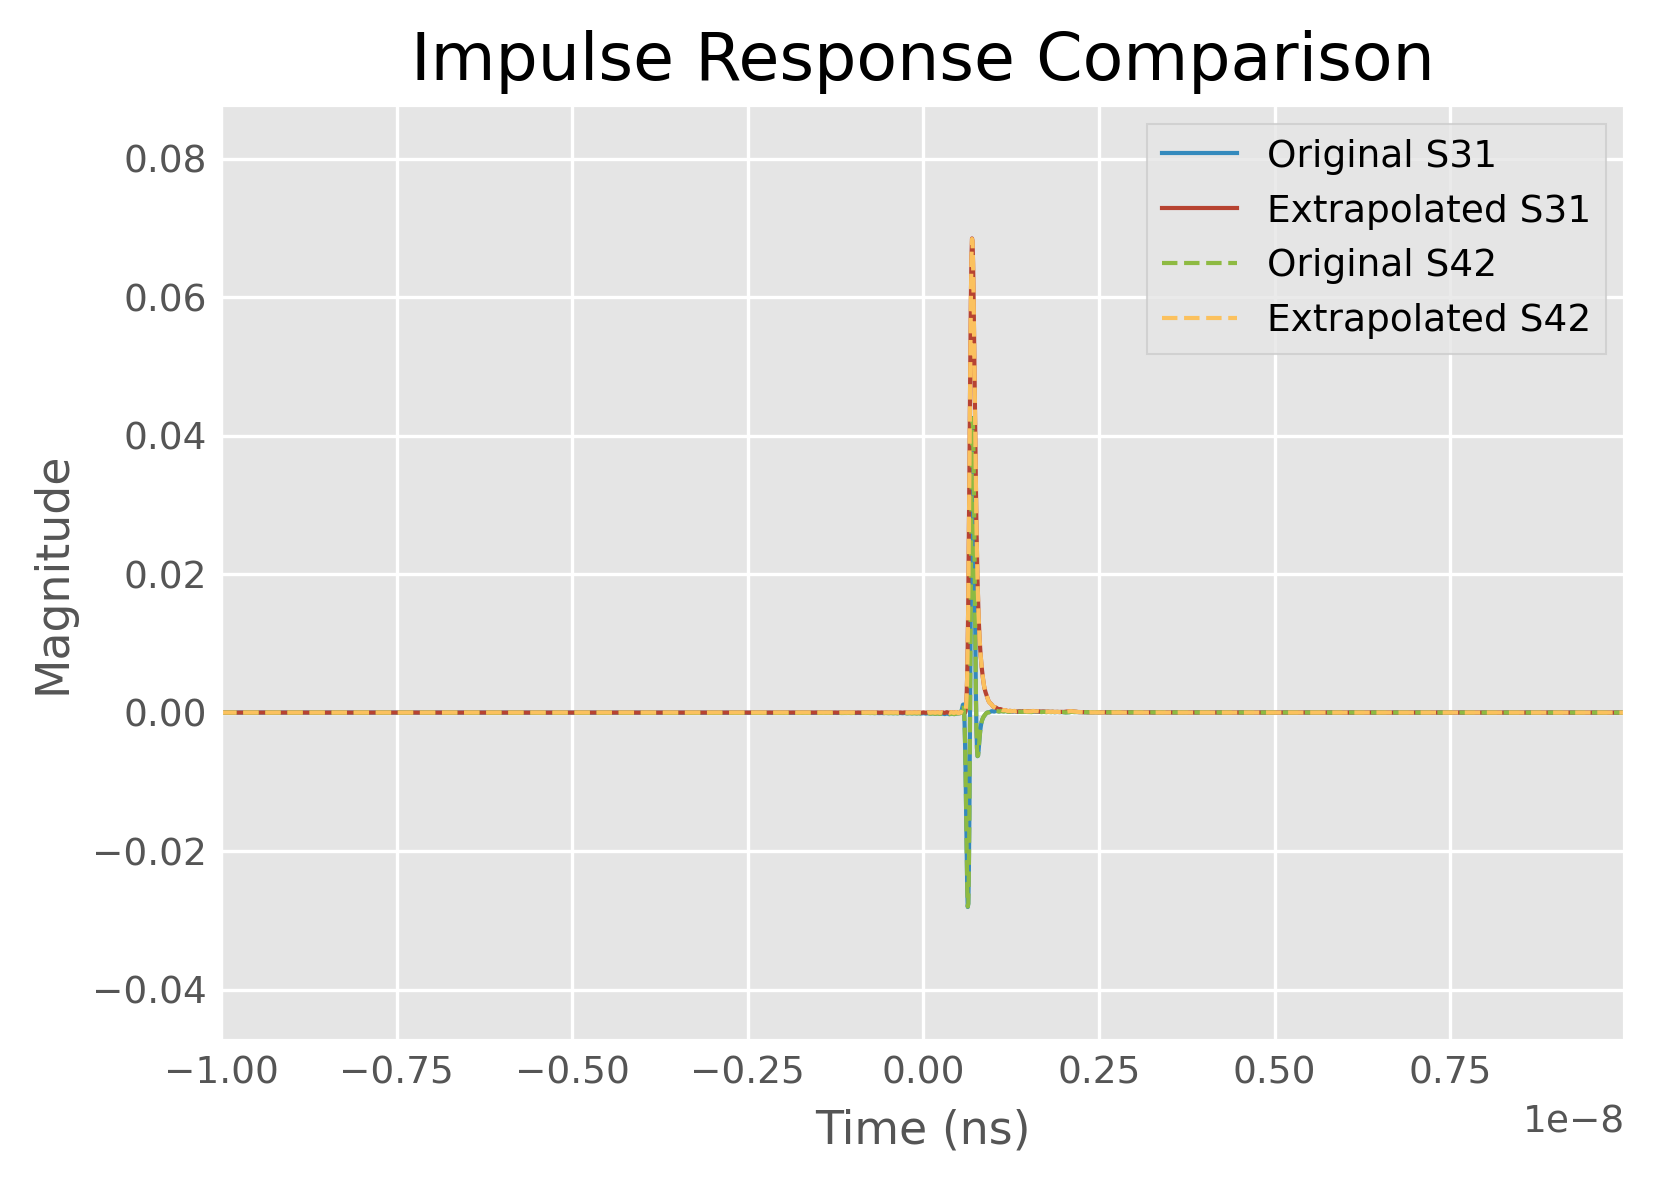

In [16]:
plt.figure(dpi=300)
plt.rcParams['font.family'] = cmufont
plt.title('Impulse Response Comparison')
t1, y1 = channel.s31.impulse_response()
t2, y2 = channel_dc.s31.impulse_response()
plt.plot(t1, y1, label='Original S31')
plt.plot(t2, y2, label='Extrapolated S31')
t3, y3 = channel.s42.impulse_response()
t4, y4 = channel_dc.s42.impulse_response()
plt.plot(t3, y3, label='Original S42',linestyle='--')
plt.plot(t4, y4, label='Extrapolated S42',linestyle='--')
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('Magnitude')

/Users/bon/opt/anaconda3/lib/python3.9/site-packages/skrf/network.py:3704: RuntimeWarning: Frequency doesn't begin from 0. Step response will not be correct.
  warnings.warn(


Text(0, 0.5, 'Magnitude')

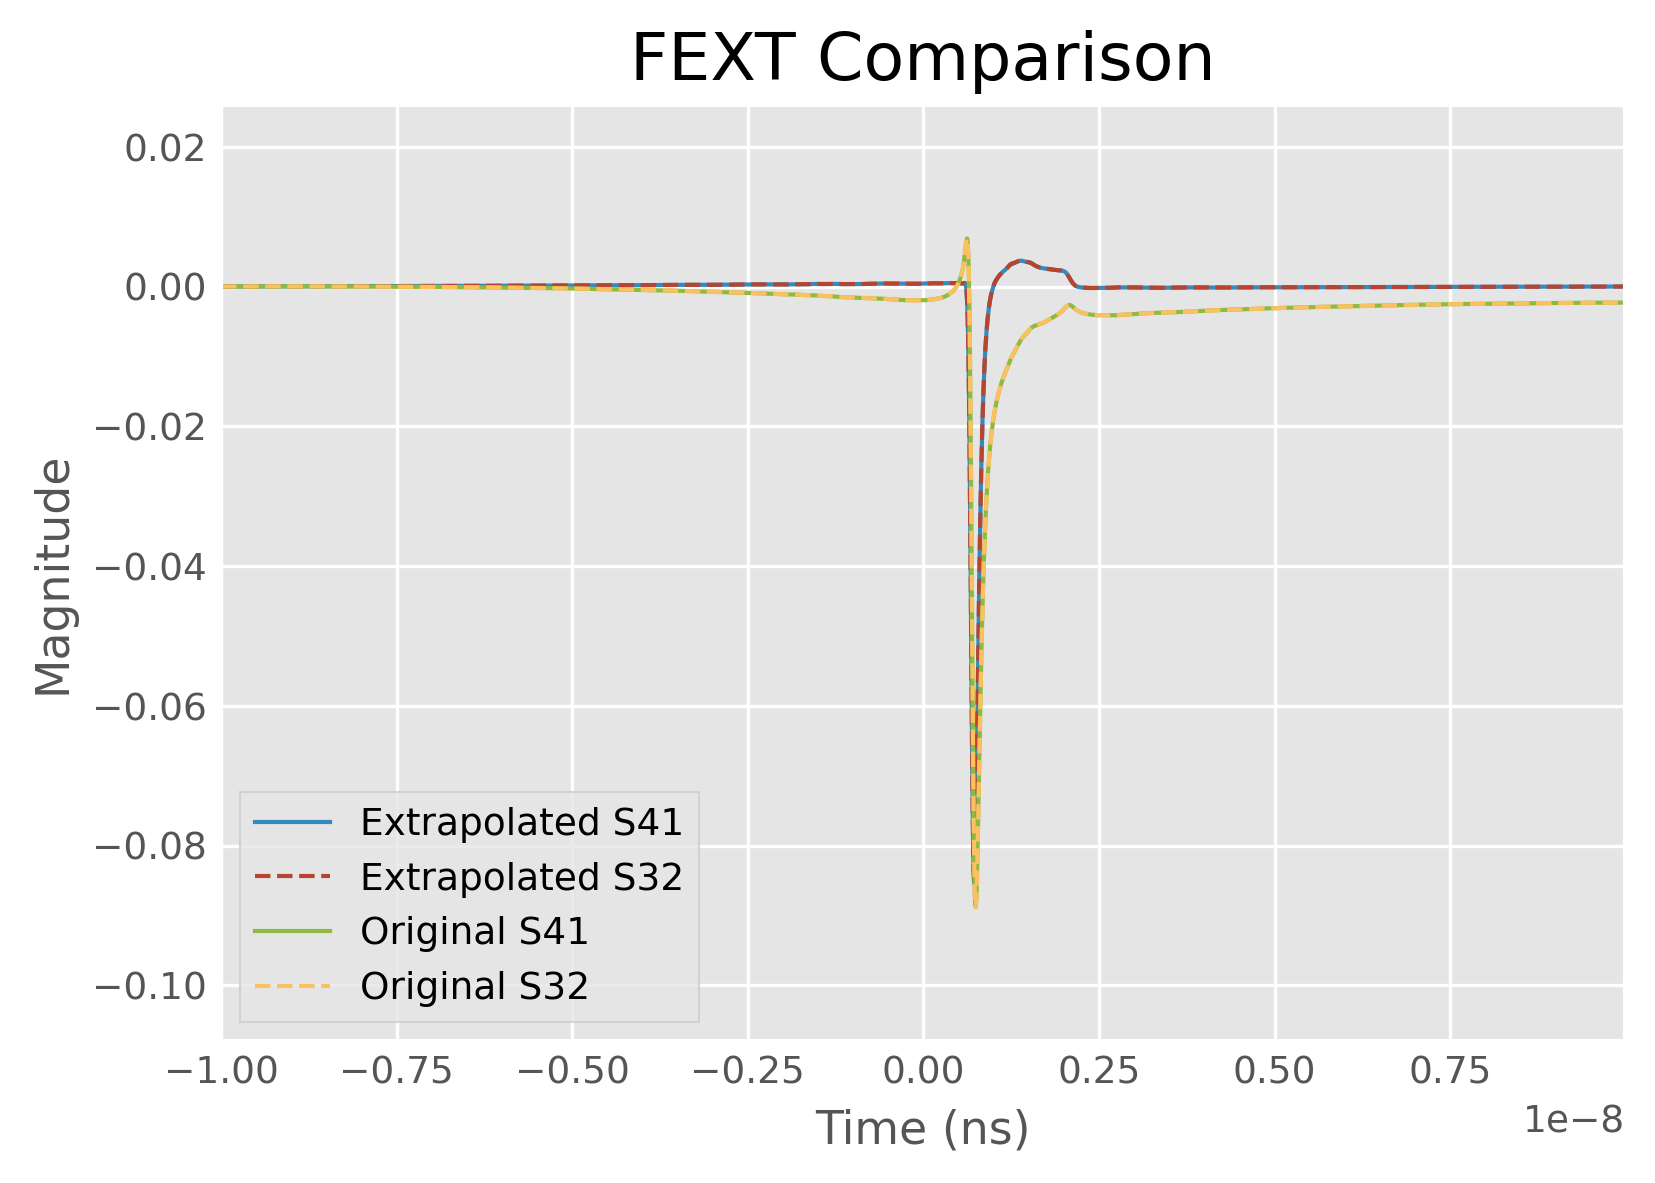

In [15]:
plt.figure(dpi=300)
plt.rcParams['font.family'] = cmufont
plt.title('FEXT Comparison')
t1, y1 = channel_dc.s41.step_response()
t2, y2 = channel_dc.s32.step_response()
plt.plot(t1, y1, label='Extrapolated S41')
plt.plot(t2, y2, label='Extrapolated S32',linestyle='--')
t3, y3 = channel.s41.step_response()
t4, y4 = channel.s32.step_response()
plt.plot(t3, y3, label='Original S41')
plt.plot(t4, y4, label='Original S32',linestyle='--')
plt.legend()
plt.xlabel('Time (ns)')
plt.ylabel('Magnitude')